### 0.补充
在介绍高斯混合模型的变分推断之前先补充两个分布的知识，一个是高斯-Wishart分布，它是高维高斯分布的共轭先验，另一个是学生t分布，它是高斯-Gamma分布对精度积分的边缘概率分布，下面分别介绍

#### 高斯-Wishart分布

对于$D$维向量$x$的多元高斯分布$N(x\mid\mu,\Lambda^{-1})$，假设精度$\Lambda$已知，则均值$\mu$的共轭先验分布仍为高斯分布，但对于均值已知，精度未知的情况，其共轭先验是Wishart分布，定义如下：   

$$
\mathcal{W}(\Lambda\mid W,\mathcal{v})=B|\Lambda|^{\frac{\mathcal{v}-D-1}{2}}exp(-\frac{1}{2}Tr(W^{-1}\Lambda))
$$  

其中，$\mathcal{v}$被称为分布的自由度数量，$W$是一个$D\times D$的标量矩阵，$Tr(\cdot)$表示矩阵的迹，归一化系数$B$为：  

$$
B(W,\mathcal{v})=|W|^{-\frac{\mathcal{v}}{2}}(2^{\frac{\mathcal {v}D}{2}}\pi^{\frac{D(D-1)}{4}}\prod_{i=1}^D\Gamma(\frac{\mathcal{v}+1-i}{2}))^{-1}
$$  

而对于均值和精度均未知的情况，那么类似于一元变量的推理方法，可以得到其共轭先验为：   

$$
p(\mu,\Lambda\mid\mu_0,beta,W,\mathcal{v})=N(\mu\mid\mu_0,(\beta\Lambda)^{-1})\mathcal{W}(\Lambda\mid W,\mathcal{v})
$$  

该分布便是高斯-Wishart分布，或者正态-Wishart分布

#### 学生t分布
根据之前的推导我们知道，对于$\mu$已知，$\tau$未知的一元高斯分布$N(x\mid\mu,\tau^{-1})$，它的共轭分布为Gamma分布，不妨表示为$Gam(\tau\mid a,b)$，如果把精度积分掉，那么就得到了一个边缘概率分布：   

$$
p(x\mid \mu,a,b)=\int_0^\infty N(x\mid\mu,\tau^{-1})Gam(\tau\mid a,b)d\tau\\
=\int_0^\infty \frac{b^ae^{(-b\tau)}\tau^{a-1}}{\Gamma(a)}(\frac{\tau}{2\pi})^{\frac{1}{2}}exp(-\frac{\tau}{2}(x-\mu)^2)d\tau\\
=\frac{b^a}{\Gamma(a)}(\frac{1}{2\pi})^{\frac{1}{2}}\int_0^\infty(\frac{z}{b+\frac{(x-\mu)^2}{2}})^{a-\frac{1}{2}}e^{-z}[b+\frac{(x-\mu)^2}{2}]^{-1}dz（令z=\tau(b+\frac{(x-\mu)^2}{2})）\\
=\frac{b^a}{\Gamma(a)}(\frac{1}{2\pi})^{\frac{1}{2}}(b+\frac{(x-\mu)^2}{2})^{-a-\frac{1}{2}}\int_0^\infty z^{(a+\frac{1}{2})-1}e^{-z}dz\\
=\frac{b^a}{\Gamma(a)}(\frac{1}{2\pi})^{\frac{1}{2}}(b+\frac{(x-\mu)^2}{2})^{-a-\frac{1}{2}}\Gamma(a+\frac{1}{2})
$$  

我们对参数做一下调整，令$\mathcal{v}=2a,\lambda=\frac{a}{b}$，那么这就是学生t分布：   

$$
St(x\mid\mu,\lambda,\mathcal{v})=\frac{\Gamma(\frac{\mathcal{v}}{2}+\frac{1}{2})}{\Gamma(\frac{\mathcal{v}}{2})}(\frac{\lambda}{\pi\mathcal{v}})^{\frac{1}{2}}(1+\frac{\lambda(x-\mu)^2}{\mathcal{v}})^{-\frac{\mathcal{v}}{2}-\frac{1}{2}}
$$  

这里，参数$\lambda$被称为t分布的精度（注意：通常情况下，它不是方差的倒数），参数$\mathcal{v}$被称为自由度，它的作用如下图所示（其中$\mu=0,\lambda=1$），对于$\mathcal{v}=1$的情况下，t分布是柯西分布，而对于$\mathcal{v}\rightarrow \infty$的情况下，t分布$St(x\mid\mu,\lambda,\mathcal{v})$就变成了高斯分布$N(x\mid\mu,\lambda^{-1})$   


![avatar](./source/15_t分布1.png)

需要注意的一点是，学生t分布可以看作无限个同均值不同精度的高斯分布相加所得到（高斯混合模型的极限），所以t分布通常有更长的“尾巴”，建模时具有更强的鲁棒性，如下图是用t分布（红线）和高斯分布（绿线）建模的对比，在未引入噪声数据之前，如（a）图，t分布和高斯分布的建模效果相同，而在引入噪声数据之后，如（b）图，会对高斯分布模型造成较大的影响，而t分布几乎不受影响

![avatar](./source/15_t分布2.png)  


高维学生t分布：   

将一维学生t分布扩展到高维，可以写作  

$$
St(x\mid\mu,\Lambda,\mathcal{v})=\frac{\Gamma(\frac{D}{2}+\frac{\mathcal{v}}{2})}{\Gamma(\frac{\mathcal{v}}{2})}\frac{|\Lambda|^{\frac{1}{2}}}{(\pi\mathcal{v})^{\frac{D}{2}}}[1+\frac{(x-\mu)^T\Lambda(x-\mu)}{\mathcal{v}}]^{-\frac{D}{2}-\frac{\mathcal{v}}{2}}
$$

其中，$D$是$x$的维度，另外t分布具有如下的性质：   

（1）$E[x]=\mu,\mathcal{v}>1$；   

（2）$cov[x]=\frac{\mathcal{v}}{\mathcal{v}-2}\Lambda^{-1},\mathcal{v}>2$；   

（3）$mode[x]=\mu$   

好的，补充内容差不多就是这些了，接下来按照上一节总结的四个步骤来介绍高斯混合模型的变分推断

### 一.联合概率分布
高斯混合模型的图模型如下图
![avatar](./source/15_VI_GMM1.png)

这里是概率图的盘式记法，其中，紫色实心的圈表示观测变量，红色空心圈表示隐变量（参数），框（盘子）内表示$N$次独立同分布的观测，接下来首先从似然函数出发，对于我们的每个观测$x_n$，都有一个对应的隐变量$z_n$，它是一个$K$维的二值向量，每个元素为$z_{nk},k=1,2,...,K$，表示对应的观测$x_n$是否采样于第$k$个高斯分布，对于给定的混合系数$\pi=\{\pi_1,\pi_2,...,\pi_K\}$（即每个高斯分布的权重系数），可以写出$Z={z_1,z_2,...,z_N}$关于$\pi$的条件概率分布：   

$$
p(Z\mid\pi)=\prod_{n=1}^N\prod_{k=1}^K\pi_k^{z_{nk}}
$$  

同样地，在给定了$Z,\mu,\Lambda=\Sigma^{-1}$的条件下，我们可以写出观测数据的条件概率分布：   

$$
p(X\mid Z,\mu,\Lambda)=\prod_{n=1}^N\prod_{k=1}^KN(x_n\mid\mu_k,\Lambda_k^{-1})^{z_{nk}}
$$  

这里，$\mu=\{\mu_k\},\Lambda=\{\Lambda_k\}$，这里使用精度矩阵是为了后面的计算方便，接下来引入参数$\mu,\Lambda,\pi$上的先验概率分布，显然为了计算简单，我们可以使用共轭先验，对于混合系数$\pi$的先验概率，我们可以使用狄利克雷分布：   

$$
p(\pi)=Dir(\pi\mid\alpha_0)=C(\alpha_0)\prod_{k=1}^K\pi_k^{\alpha_0-1}
$$  

这里，我们假设每个高斯分布的被观测的先验数量都一样为$\alpha_0$，$C(\alpha_0)$表示归一化系数，而对于$\mu,\Lambda$可以选择高斯-Wishart先验分布：  

$$
p(\mu,\Lambda)=p(\mu\mid\Lambda)p(\Lambda)\\
=\prod_{k=1}^KN(\mu_k\mid m_0,(\beta_0\Lambda_k)^{-1})\mathcal{W}(\Lambda_k\mid W_0,\mathcal{v}_0)
$$  

为了对称性，通常取$m_0=0$，注意，由于高斯-Wishart分布中$\mu$的概率分布的方差是$\Lambda$的函数，所以，这时的概率图模型需要被更新为如下形式：  
![avatar](./source/15_VI_GMM2.png)  

根据概率图模型，我们将上面的几项乘起来就是联合概率分布咯：   

$$
p(X,Z,\pi,\mu,\Lambda)=p(X\mid Z,\mu,\Lambda)p(Z\mid\pi)p(\pi)p(\mu\mid\Lambda)p(\Lambda)
$$

### 二.变分分布
上面推导出了联合概率分布，那么接下来就需要造一个变分分布去近似它的后验概率分布咯：   

$$
q(Z,\pi,\mu,\Lambda)\rightarrow p(Z,\pi,\mu,\Lambda\mid X)
$$   

接下来，我们做一个假设：变分分布可以在隐变量和参数之间记性分解，即：   

$$
q(Z,\pi,\mu,\Lambda)=q(Z)q(\pi,\mu,\Lambda)
$$  

注意，这里省略了下标，$q(Z)$与$q(\pi,\mu,\Lambda)$是不一样的分布，我们通过参数来区分不同的分布，接下来，就有：   

$$
ln\ q^*(Z)=E_{\pi,\mu,\Lambda}[ln\ p(X,Z,\pi,\mu,\Lambda)]+const
$$  

将上面，联合概率分布的表达式带入可得（将与$Z$无关的项整合到$const$中）：   

$$
ln\ q^*(Z)=E_\pi[ln\ p(Z\mid\pi)]+E_{\mu,\Lambda}[ln\ p(X\mid Z,\mu,\Lambda)]+const
$$  

替换右侧的两个条件分布，然后再次把与$Z$无关的项整合到$const$中：   

$$
ln\ q^*(Z)=\sum_{n=1}^N\sum_{k=1}^Kz_{nk}ln\ \rho_{nk}+const
$$  

其中：  
$$
ln\ \rho_{nk}=E[ln\ \pi_k]+\frac{1}{2}E[ln\ |\Lambda_k|]-\frac{D}{2}ln(2\pi)-\frac{1}{2}E_{\mu_k,\Lambda_k}[(x_n-\mu_k)^T\Lambda_k(x_n-\mu_k)]
$$   

其中，$D$是观测变量$x$的维度，对上面的等式两边取指数，有：   

$$
q^*(Z)\propto\prod_{n=1}^N\prod_{k=1}^K\rho_{nk}^{z_{nk}}
$$  

由于，$q^*(Z)$需要是归一化的，而且同时$z_{nk},k=1,2,...,K$是二值的（$K$个数中只有一个为1，其余为0），所以，我们有：   

$$
q^*(Z)=\prod_{n=1}^N\prod_{k=1}^Kr_{nk}^{z_{nk}}\\
r_{nk}=\frac{\rho_{nk}}{\sum_{j=1}^K\rho_{nj}}
$$  

对于离散情况有：   

$$
E[z_{nk}]=r_{nk}
$$  

可以发现，$q^*(Z)$的最优解是依赖于其他变量的，即它们是耦合的，需要使用迭代的方式进行求解，为了后面的推导方便，我们定义如下的三个量：   

$$
N_k=\sum_{n=1}^Nr_{nk}\\
\bar{x}_k=\frac{1}{N_k}\sum_{n=1}^Nr_{nk}x_n\\
S_k=\frac{1}{N_k}\sum_{n=1}^Nr_{nk}(x_n-\bar{x}_k)(x_n-\bar{x}_k)^T
$$  

大家可以发现，这里定义的这些量其实和EM算法中计算用到的量类似，接下来看看$q(\pi,\mu,\Lambda)$：   

$$
ln\ q^*(\pi,\mu,\Lambda)=ln\ p(\pi)+\sum_{k=1}^Kln\ p(\mu_k,\Lambda_k)+E_Z[ln\ p(Z\mid\pi)]+\sum_{k=1}^K\sum_{n=1}^NE[z_{nk}]ln\ N(x_n\mid\mu_k,\Lambda_k^{-1})+const
$$  

可以发现，表达式右边中一些项只与$\pi$相关，另外一些项只与$\mu$和$\Lambda$相关，也就是说$q(\pi,\mu,\Lambda)$还可以进一步分解为$q(\pi)q(\mu,\Lambda)$，而$q(\mu,\Lambda)$由可以分解为$k$与$\mu_k,\Lambda_k$相关的项，所以：   

$$
q(\pi,\mu,\Lambda)=q(\pi)\prod_{k=1}^Kq(\mu_k,\Lambda_k)
$$  

分离出与$\pi$相关的项，我们有：   

$$
ln\ q^*(\pi)=(\alpha_0-1)\sum_{k=1}^Kln\ \pi_k+\sum_{k=1}^K\sum_{n=1}^Nr_{nk}ln\ \pi_k+const
$$  

对上面的表达式两侧取指数可以发现，$q^*(\pi)$是一个狄利克雷分布：   

$$
q^*(\pi)=Dir(\pi\mid\alpha),\alpha_k=\alpha_0+N_k
$$    

最后，我们可以推出$q^*(\mu_k,\Lambda_k)$是一个高斯-Wishart分布：   

$$
q^*(\mu_k,\Lambda_k)=N(\mu_k\mid m_k,(\beta_k\Lambda_k)^{-1})\mathcal{W}(\Lambda_k\mid W_k,\mathcal{v}_k)
$$   

其中：   

$$
\beta_k=\beta_0+N_k\\
m_k=\frac{1}{\beta_k}(\beta_0m_0+N_k\bar{x}_k)\\
W_k^{-1}=W_0^{-1}+N_kS_k+\frac{\beta_0N_k}{\beta_0+N_k}(\bar{x}_k-m_0)(\bar{x}_k-m_0)^T\\
\mathcal{v}_k=\mathcal{v}_0+N_k
$$

### 三.迭代更新

根据上面的推导，迭代更新流程就知道了：$r_{nk}\rightarrow \pi_k,\mu_k,\Lambda_k\rightarrow r_{nk}\rightarrow \cdots$，剩余还需要进一步求解的便是$r_{nk}$被归一化前的变量$\rho_{nk}$，它的计算公式，我们再写一下：   

$$
ln\ \rho_{nk}=E[ln\ \pi_k]+\frac{1}{2}E[ln\ |\Lambda_k|]-\frac{D}{2}ln(2\pi)-\frac{1}{2}E_{\mu_k,\Lambda_k}[(x_n-\mu_k)^T\Lambda_k(x_n-\mu_k)]
$$  

根据Wishart分布，狄利克雷分布的特性，我们可以得到：   

$$
E[ln\ |\Lambda_k|]=\sum_{i=1}^D\psi(\frac{\mathcal{v}_k+1-i}{2})+Dln2+ln|W_k|\\
E[ln\ \pi_k]=\psi(\alpha_k)-\psi(\hat{\alpha})
$$   

这里$\hat{\alpha}=\sum_k\alpha_k$，$\psi(\cdot)$表示Digamma函数：   
$$
\psi(a)=\frac{d}{da}ln\Gamma(a)
$$  

另外，由高斯-Wishart分布，可以求得：   


$$
E_{\mu_k,\Lambda_k}[(x_n-\mu_k)^T\Lambda_k(x_n-\mu_k)]=D\beta_k^{-1}+\mathcal{v}_k(x_n-m_k)^TW_k(x_n-m_k)
$$


### 四.变分分布的应用：概率密度预测
对于GMM，我们通常对新样本$\hat{x}$的概率密度感兴趣，根据贝叶斯推断理论，它的预测过程可以写作：   

$$
p(\hat{x}\mid X)=\sum_{\hat{z}}\int\int\int p(\hat{x}\mid \hat{z},\mu,\Lambda)p(\hat{z}\mid \pi)p(\pi,\mu,\Lambda\mid X)d\pi d\mu d\Lambda\\
=\sum_{k=1}^K\int\int\int \pi_kN(\hat{x}\mid \mu_k,\Lambda_k^{-1})p(\pi,\mu,\Lambda\mid X)d\pi d\mu d\Lambda（消去\hat{x}）\\
\simeq \sum_{k=1}^K\int\int\int \pi_kN(\hat{x}\mid \mu_k,\Lambda_k^{-1})q(\pi)q(\mu_k,\Lambda_k)d\pi d\mu_k d\Lambda_k（变分分布替换后验分布）\\
=\frac{1}{\hat{\alpha}}\sum_{k=1}^K\alpha_kSt(\hat{x}\mid m_k,L_k,\mathcal{v}_k+1-D)
$$  

我们最终发现，概率密度其实是学生t分布的混合，其中：   

$$
L_k=\frac{(\mathcal{v}_k+1-D)\beta_k}{1+\beta_k}W_k
$$  

各符号的意义与前面推导的一致

### 五.代码实现
首先，我们将几个分布的函数写一下

In [41]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
"""
代码封装到utils中
"""

def dirichlet(u, alpha):
    """
    狄利克雷分布
    :param u: 随机变量
    :param alpha: 超参数
    :return:
    """
    # 计算归一化因子
    beta = special.gamma(np.sum(alpha))
    for alp in alpha:
        beta /= special.gamma(np.sum(alp))
    rst = beta
    # 计算结果
    for idx in range(0, len(alpha)):
        rst *= np.power(u[idx], alpha[idx] - 1)
    return rst


def wishart(Lambda, W, v):
    """
    wishart分布
    :param Lambda:随机变量
    :param W:超参数
    :param v:超参数
    :return:
    """
    # 维度
    D = W.shape[0]
    # 先计算归一化因子
    B = np.power(np.linalg.det(W), -1 * v / 2)
    B_ = np.power(2.0, v * D / 2) * np.power(np.pi, D * (D - 1) / 4)
    for i in range(1, D + 1):
        B_ *= special.gamma((v + 1 - i) / 2)
    B = B / B_
    # 计算剩余部分
    rst = B * np.power(np.linalg.det(Lambda), (v - D - 1) / 2)
    rst *= np.exp(-0.5 * np.trace(np.linalg.inv(W) @ Lambda))
    return rst


def St(X, mu, Lambda, v):
    """
    学生t分布
    :param X: 随机变量
    :param mu: 超参数
    :param Lambda: 超参数
    :param v: 超参数
    :return:
    """
    n_sample, D = X.shape
    return special.gamma(D / 2 + v / 2) * np.power(np.linalg.det(Lambda), 0.5) * np.power(
        1 + np.sum((X - mu) @ Lambda * (X - mu), axis=1) / v, -1.0 * D / 2 - v / 2) / special.gamma(v / 2) / np.power(
        np.pi * v, D / 2)

接下里就是模型代码了...

In [43]:
import os
os.chdir('../')
from ml_models import utils


"""
高斯混合模型的变分推断实现，封装到ml_models.vi中
"""


class GMMCluster(object):
    def __init__(self, n_components=1, tol=1e-6, n_iter=100, prior_dirichlet_alpha=None, prior_gaussian_mean=None,
                 prior_gaussian_beta=None, prior_wishart_w=None, prior_wishart_v=None,
                 verbose=False):
        """
        GMM的VI实现
        :param n_components: 高斯混合模型数量
        :param tol: -log likehold增益<tol时，停止训练
        :param n_iter: 最多迭代次数
        :prior_dirichlet_alpha:先验狄利克雷分布的超参数
        :prior_gaussian_mean:先验高斯分布的均值
        :prior_gaussian_beta:先验高斯分布的beta值，即精度前的系数
        :prior_wishart_w:先验wishart分布的w
        :prior_wishart_v:先验wishart分布的v
        :param verbose: 是否可视化训练过程
        """
        self.n_components = n_components
        self.tol = tol
        self.n_iter = n_iter
        self.verbose = verbose
        self.prior_dirichlet_alpha = prior_dirichlet_alpha
        self.prior_gaussian_mean = prior_gaussian_mean
        self.prior_gaussian_beta = prior_gaussian_beta
        self.prior_wishart_w = prior_wishart_w
        self.prior_wishart_v = prior_wishart_v
        # 填充默认值
        if self.prior_dirichlet_alpha is None:
            self.prior_dirichlet_alpha_0 = np.asarray([1] * n_components)
        self.prior_dirichlet_alpha = self.prior_dirichlet_alpha_0 + np.random.random(size=n_components) * 0.1
        if self.prior_gaussian_beta is None:
            self.prior_gaussian_beta_0 = np.asarray([1] * n_components)
        self.prior_gaussian_beta = self.prior_gaussian_beta_0 + np.random.random(size=n_components) * 0.1

        # 高斯模型参数
        self.params = []
        # 记录数据维度
        self.D = None

    def _init_params(self):
        """
        初始化另一部分参数
        :return:
        """
        # 设置p(miu,lambda)中每个高斯分量的m0都为向量0
        if self.prior_gaussian_mean is None:
            self.prior_gaussian_mean_0 = np.zeros(shape=(self.n_components, self.D))
        self.prior_gaussian_mean = self.prior_gaussian_mean_0 + np.random.random(
            size=(self.n_components, self.D)) * 0.1
        
        # 对先验wishart分布参数进行填充
        if self.prior_wishart_w is None:
            self.prior_wishart_w_0 = [np.identity(self.D)] * self.n_components  # 单位矩阵
        self.prior_wishart_w = []
        for w in self.prior_wishart_w_0:
            self.prior_wishart_w.append(w + np.random.random(size=(self.D, self.D)) * 0.1)
        
        # 初始化每个分量的自由度参数v=维数D
        if self.prior_wishart_v is None:
            self.prior_wishart_v_0 = np.asarray([self.D] * self.n_components)
        self.prior_wishart_v = self.prior_wishart_v_0 + np.random.random(size=self.n_components) * 0.1

    def _update_single_step(self, X):
        # 首先计算3个期望
        E_ln_Lambda = []
        for k in range(0, self.n_components):
            value = self.D * np.log(2) + np.log(np.linalg.det(self.prior_wishart_w[k]))
            for i in range(1, self.D + 1):
                value += utils.special.digamma((self.prior_wishart_v[k] + 1 - i) / 2)
            E_ln_Lambda.append(value)
        E_ln_pi = []
        hat_alpha = np.sum(self.prior_dirichlet_alpha)
        for k in range(0, self.n_components):
            E_ln_pi.append(utils.special.digamma(self.prior_dirichlet_alpha[k]) - utils.special.digamma(hat_alpha))
        E_mu_Lambda = []
        for k in range(0, self.n_components):
            value = self.D * (1.0 / self.prior_gaussian_beta[k]) + np.sum(self.prior_wishart_v[k] * (
                X - self.prior_gaussian_mean[k]) @ self.prior_wishart_w[k] * (X - self.prior_gaussian_mean[k]), axis=1)
            E_mu_Lambda.append(value)
        # 然后计算 r_nk
        rho_n_k = []
        for k in range(0, self.n_components):
            value = np.exp(E_ln_pi[k] + 0.5 * E_ln_Lambda[k] - self.D / 2.0 * np.log(2 * np.pi) - 0.5 * E_mu_Lambda[k])
            rho_n_k.append(value)
        rho_n_k = np.asarray(rho_n_k).T
        r_n_k = rho_n_k / np.sum(np.asarray(rho_n_k), axis=1, keepdims=True)

        # 然后计算N_k,\bar{x}_k,S_k
        N_k = np.sum(r_n_k, axis=0)
        x_k = []
        for k in range(0, self.n_components):
            x_k.append(np.sum(r_n_k[:, [k]] * X, axis=0) / N_k[k])
        S_k = []
        for k in range(0, self.n_components):
            S_k.append(np.transpose(r_n_k[:, [k]] * (X - x_k[k])) @ (r_n_k[:, [k]] * (X - x_k[k])) / N_k[k])

        # 最后更新变分分布中的各个参数
        for k in range(0, self.n_components):
            self.prior_dirichlet_alpha[k] = self.prior_dirichlet_alpha_0[k] + N_k[k]

            self.prior_gaussian_beta[k] = self.prior_gaussian_beta_0[k] + N_k[k]

            self.prior_gaussian_mean[k] = 1.0 / self.prior_gaussian_beta[k] * (
                self.prior_gaussian_beta_0[k] * self.prior_gaussian_mean_0[k] + N_k[k] * x_k[k])

            W_k_inv = np.linalg.inv(self.prior_wishart_w_0[k]) + N_k[k] * S_k[k] + (self.prior_gaussian_beta_0[k] * N_k[
                k]) / (self.prior_gaussian_beta_0[k] + N_k[k]) * np.transpose(
                x_k[k] - self.prior_gaussian_mean_0[k]) @ (x_k[k] - self.prior_gaussian_mean_0[k])

            self.prior_wishart_w[k] = np.linalg.inv(W_k_inv)

            self.prior_wishart_v[k] = self.prior_wishart_v_0[k] + N_k[k]

    def fit(self, X):
        n_sample, n_feature = X.shape
        self.D = n_feature
        self._init_params()
        last_rst = np.zeros(n_sample)
        # 迭代训练
        for _ in range(0, self.n_iter):
            self._update_single_step(X)
            if self.verbose:
                utils.plot_contourf(X, lambda x: self.predict_sample_generate_proba(x), lines=5)
                utils.plt.pause(0.1)
                utils.plt.clf()
            current_rst = self.predict_sample_generate_proba(X)
            if np.mean(np.abs(current_rst - last_rst)) < self.tol:
                break
            last_rst = current_rst

        if self.verbose:
            utils.plot_contourf(X, lambda x: self.predict_sample_generate_proba(x), lines=5)
            utils.plt.show()

    def predict_proba(self, X):
        # 预测样本在几个St上的概率分布
        _, D = X.shape
        hat_alpha = np.sum(self.prior_dirichlet_alpha)
        W = np.asarray([utils.St(X, self.prior_gaussian_mean[k],
                                 (self.prior_wishart_v[k] + 1 - D) / (1 + self.prior_gaussian_beta[k]) *
                                 self.prior_wishart_w[k] * self.prior_gaussian_beta[k],
                                 self.prior_wishart_v[k] + 1 - D) * self.prior_dirichlet_alpha[
                            k] / hat_alpha for k in range(0, self.n_components)]).T
        W = W / np.sum(W, axis=1, keepdims=True)
        return W

    def predict(self, X):
        # 预测样本最有可能产生于那一个高斯模型
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_sample_generate_proba(self, X):
        # 返回样本的生成概率
        _, D = X.shape
        hat_alpha = np.sum(self.prior_dirichlet_alpha)
        W = np.asarray([utils.St(X, self.prior_gaussian_mean[k],
                                 (self.prior_wishart_v[k] + 1 - D) / (1 + self.prior_gaussian_beta[k]) *
                                 self.prior_wishart_w[k] * self.prior_gaussian_beta[k],
                                 self.prior_wishart_v[k] + 1 - D) * self.prior_dirichlet_alpha[
                            k] / hat_alpha for k in range(0, self.n_components)]).T
        return np.sum(W, axis=1)

测试...

In [44]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.55, random_state=0)
X = X[:, ::-1]

In [45]:
#训练，查看收敛过程可以设置verbose=True
gmm = GMMCluster(verbose=False, n_iter=100, n_components=4)
gmm.fit(X)

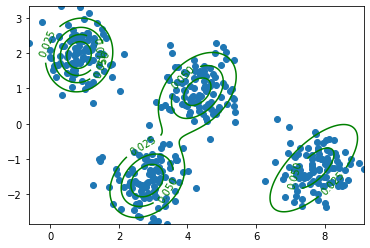

In [46]:
#查看效果
utils.plot_contourf(X,gmm.predict_sample_generate_proba,lines=5)

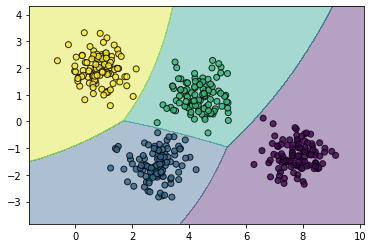

In [47]:
#查看分类边界
utils.plot_decision_function(X,gmm.predict(X),gmm)

可以发现VI的收敛效果还是不错的，接下来再做一个测试，假如初始的n_components设置很大会怎样

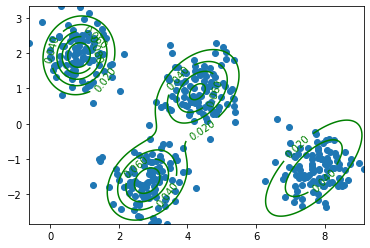

In [48]:
gmm = GMMCluster(verbose=False, n_iter=100, n_components=20)
gmm.fit(X)
utils.plot_contourf(X,gmm.predict_sample_generate_proba,lines=5)

可以发现，上面设置初始聚类中心为20和设置为4的训练结果一样，说明**VI训练的GMM对超参数并不敏感**（这主要是由于引入了先验分布的缘故），所以我们不必再对超参数做交叉验证进行选择了....

### 六.总结一下
这一节完整的使用了四个步骤来做GMM的训练，虽然结果还OK，但我们需要更加清晰的认识到一个事实：**如何对隐变量进行拆分，以及假设各变量子集服从何种分布是成功的关键**，如果拆分方式不对，或者分布假设不对可能会取得比较差的结果（并没有做实验去检验...《机器学习》书上的观点）